# Utilities for MIDI files preprocessing

In [2]:
# Necessary libraries
import numpy as np
import pretty_midi
import matplotlib.pyplot as plt
import librosa, librosa.display
from os import listdir

In [3]:
import import_ipynb
import constants as c

importing Jupyter notebook from constants.ipynb


In [4]:
# Allow pretty_midi to read MIDI files with absurdly high tick rates.
# Useful for reading the MAPS dataset.
# https://github.com/craffel/pretty-midi/issues/112
# Reprinted from: https://github.com/tensorflow/magenta/blob/master/magenta/music/midi_io.py
pretty_midi.pretty_midi.MAX_TICK = 1e10

In [31]:
def plot_piano_roll(pm, fs=c.FRAMES_PER_SEC):
    """
    - Visualization of MIDI data, which is a time-frequency matrix
    - Reprinted from: https://github.com/craffel/pretty-midi/blob/master/Tutorial.ipynb
    - Adjusted for our project
    """
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(pm,
                             hop_length=1, 
                             sr=fs, 
                             x_axis='time', 
                             y_axis='cqt_note')
    plt.savefig(fname='piano_roll.jpeg', format='jpg')
    

def load_midi_sequences(path):
    """Load MIDI files from path into array of PrettyMIDI objects"""
    files = listdir(path)
    midi_files = [mid for mid in files if mid.endswith('.mid')]
    
    midis = []
    for midi in midi_files:
        pm = pretty_midi.PrettyMIDI(path + '\\' + midi)
        midis.append(pm)
    return midis

def split_midi(midi_matrix, shift_split=c.FRAME_SLICE):
    return midi_matrix[:, shift_split:len(midi_matrix[0])-shift_split]

def midi_split_to_sequence(midi_matrix,
                           padding=c.FRAME_SLICE,
                           sequence_length=c.SEQUENCE_CHUNK_LENGTH):
    """Split MIDI matrix into chunks with specified length and padding"""
    
    sequence_chunks = []
    start = padding
    end = midi_matrix[0].size - padding
    for i in range(start, end, sequence_length):
        print(i)
        sequence_chunks.append(midi_matrix[:, i:i+sequence_length])
    return sequence_chunks

def pretty_midi_to_onset_matrix(pm, fs=c.FRAMES_PER_SEC):
    """Takes the input PrettyMIDI object and generate (one-hot) onset matrix"""
    
    # Allocate a matrix of zeros 
    one_hot = np.zeros(pm.get_piano_roll(fs=fs).shape)

    for instrument in pm.instruments:
        for note in instrument.notes:
            # Find onset frame and set it to 1
            frame = int(np.rint(note.start*fs))
            one_hot[note.pitch, frame] = 1
            for i in range(3):
                back_frame = frame-i
                front_frame = frame+i
                if (back_frame >= 0):
                    one_hot[note.pitch, back_frame] = 1
                if (front_frame < one_hot[0].size):
                    one_hot[note.pitch, front_frame] = 1
    return one_hot[c.MIDI_MIN:c.MIDI_MAX+1, :]

def pretty_midi_to_frame_matrix(pm):
    """Takes the input MIDI matrix and converts it to binary (one-hot)"""
    
    one_hot = [[1 if note != 0 else 0 for note in notes] for notes in pm]
    return np.array(one_hot)

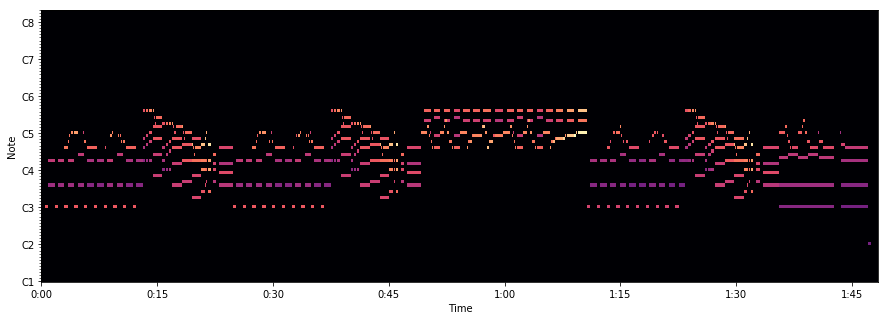

In [32]:
midi = pretty_midi.PrettyMIDI('D:\School\Bc\model\MAPS\AkPnBcht\MUS\MAPS_MUS-grieg_walzer_AkPnBcht.mid')
midi = midi.get_piano_roll(fs=c.FRAMES_PER_SEC)[c.MIDI_MIN:c.MIDI_MAX+1, :]
plot_piano_roll(midi)

In [33]:
midi_chunks = midi_split_to_sequence(midi)

2
627
1252
1877
2502
3127


In [34]:
midi_chunks[0].shape, midi.shape, midi_chunks[5].shape

((88, 625), (88, 3388), (88, 261))

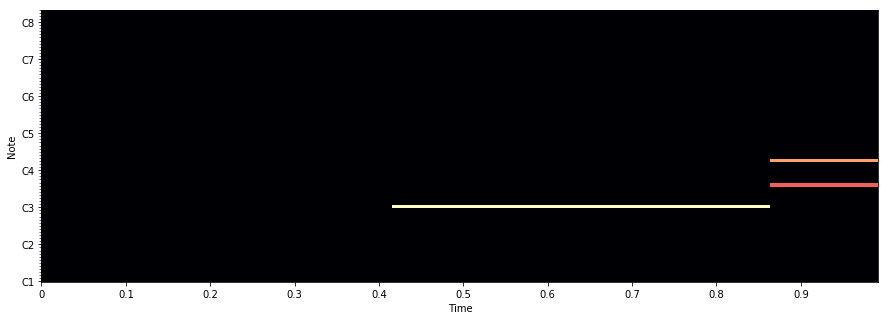

In [35]:
plot_piano_roll(midi_chunks[0][:, :31])

In [61]:
# plt.figure(figsize=(15, 5))
# plot_piano_roll(p, MIDI_MIN, MIDI_MAX+1)
# plt.savefig(fname='piano_roll.jpeg', format='jpg')

In [8]:
#[MIDI_MIN:MIDI_MAX+1 ,50:51]
# p.get_piano_roll(fs=FRAMES_PER_SEC)[MIDI_MIN:MIDI_MAX+1, :].shape

In [9]:
# midi_chunks = split_midi(p.get_piano_roll(fs=FRAMES_PER_SEC)[MIDI_MIN:MIDI_MAX+1, :])

In [10]:
# for i in range(30, 40):
#     librosa.display.specshow(midi_chunks[i][:, :],
#                              hop_length=1, 
#                              sr=FRAMES_PER_SEC, 
#                              x_axis='time', 
#                              y_axis='cqt_note',
#                              fmin=SPEC_FMIN)
#     plt.show()

In [11]:
# for i in pm.instruments:
#     for n in i.notes:
#         print(n.start)